In [ ]:
# required imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_tree
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, f1_score, roc_curve, confusion_matrix

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

%matplotlib inline

In [ ]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the dataset and reading the head
df = pd.read_csv('/content/drive/MyDrive/pima/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# shape of the data
df.shape

(768, 9)

In [ ]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# all columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# distribution of Outcome variable
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# extracting dependent and independent variable
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)

In [ ]:
# train/test split of the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=47)

In [ ]:
# shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### **XG Boost Classifier**

In [ ]:
# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
print('The training accuracy of the model: ', round(accuracy_score(y_train, xgb_model.predict(X_train)), 4))
print('The training recall of the model: ', round(recall_score(y_train, xgb_model.predict(X_train)), 4))
print('The training precision of the model: ', round(precision_score(y_train, xgb_model.predict(X_train)), 4))
print('The training f1_score of the model: ', round(f1_score(y_train, xgb_model.predict(X_train)), 4))

The training accuracy of the model:  1.0
The training recall of the model:  1.0
The training precision of the model:  1.0
The training f1_score of the model:  1.0


In [ ]:
print('The test accuracy of the model: ', round(accuracy_score(y_test, xgb_model.predict(X_test)), 4))
print('The test recall of the model: ', round(recall_score(y_test, xgb_model.predict(X_test)), 4))
print('The test precision of the model: ', round(precision_score(y_test, xgb_model.predict(X_test)), 4))
print('The test f1_score of the model: ', round(f1_score(y_test, xgb_model.predict(X_test)), 4))

The test accuracy of the model:  0.6823
The test recall of the model:  0.5077
The test precision of the model:  0.5323
The test f1_score of the model:  0.5197


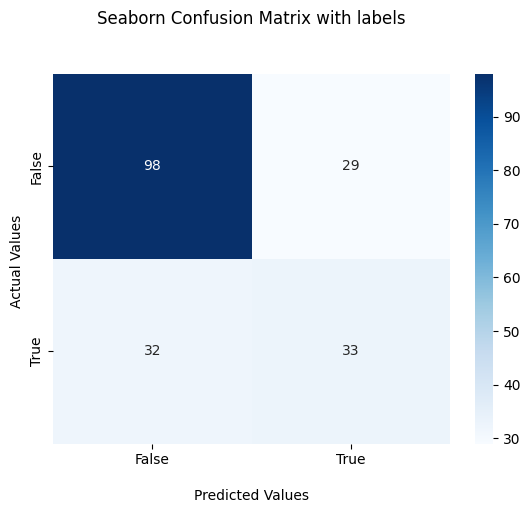

In [ ]:

y_pred = xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

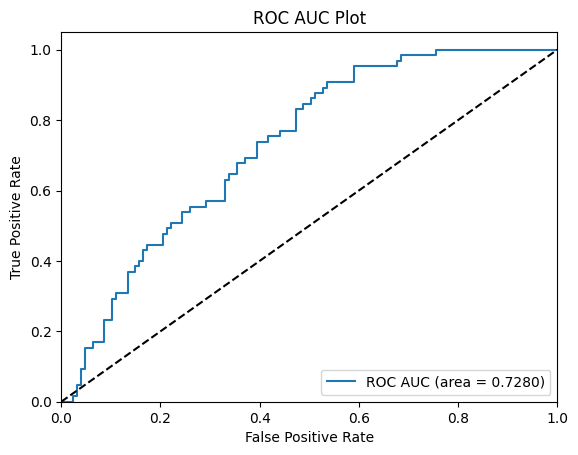

In [ ]:
# Calculate ROC AUC score
y_prob = [probs[1] for probs in xgb_model.predict_proba(X_test)]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

#### **Hyper-Parameter Tuning for XG Boost Classifier**

In [ ]:
## Hyperparameter tuning ranges
n_estimators_tune = [100, 200, 300, 400]
learning_rate_tune = [0.01, 0.05, 0.1, 0.3]
max_depth_tune = [2, 3, 5, 7]
min_child_weight_tune = [1, 3, 5]
gamma_tune = [0, 0.1, 0.2]
reg_alpha_tune = [0, 0.1, 0.5, 1, 10]
reg_lambda_tune = [0, 0.1, 0.5, 1, 10]
colsample_bytree_tune =  [0.5, 0.7, 1.0]
subsample_tune = [0.5, 0.7, 1.0]

In [ ]:
#################################
## Cross-validation and tuning ##
##           ROUND 1           ##
#################################
## Set cross-validation and defaults
cv = 5

## Setting grid
#param_grid_1 = dict(learning_rate=learning_rate_tune,
#                    n_estimators=n_estimators_tune)

param_grid_1 = {'learning_rate': learning_rate_tune,
                'n_estimators' : n_estimators_tune
               }

## Building model
xgb_clf = xgb.XGBClassifier(random_state=1)

## Optimal params of model
optimal_params_1=GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_1,
    scoring='f1_macro',
    cv=cv
  )

## Fitting model
start_time = time.time()
optimal_params_1.fit(X_train, y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("Learning rate: ", optimal_params_1.best_params_['learning_rate'])
print("n_estimators: ",optimal_params_1.best_params_['n_estimators'])

My program took 0.3856867074966431 to run
Learning rate:  0.01
n_estimators:  300


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_1.best_score_, optimal_params_1.best_params_))
means = optimal_params_1.cv_results_['mean_test_score']
stds = optimal_params_1.cv_results_['std_test_score']
params = optimal_params_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765126 using {'learning_rate': 0.01, 'n_estimators': 300}
0.754328 (0.017206) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.758048 (0.012345) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.765126 (0.016931) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.756460 (0.019559) with: {'learning_rate': 0.01, 'n_estimators': 400}
0.759731 (0.013533) with: {'learning_rate': 0.05, 'n_estimators': 100}
0.752806 (0.018049) with: {'learning_rate': 0.05, 'n_estimators': 200}
0.754032 (0.015185) with: {'learning_rate': 0.05, 'n_estimators': 300}
0.749134 (0.015529) with: {'learning_rate': 0.05, 'n_estimators': 400}
0.745314 (0.008159) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.742686 (0.006920) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.730552 (0.003262) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.730059 (0.006127) with: {'learning_rate': 0.1, 'n_estimators': 400}
0.734920 (0.012496) with: {'learning_rate': 0.3, 'n_estimators': 100}
0.738793 (0.0131

In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 1                  #
#------------------------------------------------------#
y_train_pred1 = optimal_params_1.best_estimator_.predict(X_train)
y_test_pred1 = optimal_params_1.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred1), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred1), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred1), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred1), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred1), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred1), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred1), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred1), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.9497
Train RECALL:  0.9064
Train PRECISION:    0.9485
Train F1-Score:    0.927


Test Accuracy:   0.7188
Test RECALL:  0.5077
Test PRECISION:    0.6
Test F1-Score:    0.55


In [ ]:
#################################
##           ROUND 2           ##
#################################
learning_rate = optimal_params_1.best_params_['learning_rate']
n_estimators = optimal_params_1.best_params_['n_estimators']

param_grid_2 = {'learning_rate'   :[learning_rate],
                'n_estimators'    :[n_estimators],
                'max_depth'       : max_depth_tune,
                'min_child_weight': min_child_weight_tune,
                'gamma': gamma_tune
               }

## Building model
xgb_clf = xgb.XGBClassifier(random_state=1)

optimal_params_2 = GridSearchCV(
    estimator = xgb_clf,
    param_grid = param_grid_2,
    scoring = 'f1_macro',
    cv = cv
  )

start_time = time.time()
optimal_params_2.fit(X_train,
                     y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("max_depth: ", optimal_params_2.best_params_['max_depth'])
print("min_child_weight: ",optimal_params_2.best_params_['min_child_weight'])
print("gamma: ",optimal_params_2.best_params_['gamma'])

My program took 0.7872006217638652 to run
max_depth:  5
min_child_weight:  1
gamma:  0.1


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_2.best_score_, optimal_params_2.best_params_))
means = optimal_params_2.cv_results_['mean_test_score']
stds = optimal_params_2.cv_results_['std_test_score']
params = optimal_params_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771453 using {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
0.731312 (0.019062) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300}
0.736913 (0.018996) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 300}
0.730022 (0.018730) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 300}
0.730797 (0.011368) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
0.727700 (0.019837) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}
0.726882 (0.017972) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300}
0.771365 (0.019341) with: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
0.757151 (0.025360) with: {

In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 2                  #
#------------------------------------------------------#
y_train_pred2 = optimal_params_2.best_estimator_.predict(X_train)
y_test_pred2 = optimal_params_2.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred2), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred2), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred2), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred2), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred2), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred2), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred2), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred2), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.9271
Train RECALL:  0.8719
Train PRECISION:    0.9171
Train F1-Score:    0.8939


Test Accuracy:   0.7188
Test RECALL:  0.4923
Test PRECISION:    0.6038
Test F1-Score:    0.5424


In [ ]:
#################################
##           ROUND 3           ##
#################################
max_depth = optimal_params_2.best_params_['max_depth']
min_child_weight = optimal_params_2.best_params_['min_child_weight']
gamma = optimal_params_2.best_params_['gamma']

param_grid_3 = {'learning_rate'   :[learning_rate],
                'n_estimators'    :[n_estimators],
                'max_depth'       :[max_depth],
                'min_child_weight':[min_child_weight],
                'gamma'           :[gamma],
                'reg_alpha': reg_alpha_tune,
                'reg_lambda': reg_lambda_tune
               }

## Building model
xgb_clf = xgb.XGBClassifier(random_state=1)

optimal_params_3 = GridSearchCV(
    estimator = xgb_clf,
    param_grid = param_grid_3,
    scoring = 'f1_macro',
    cv = cv
  )

start_time = time.time()
optimal_params_3.fit(X_train,
                     y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("reg_alpha: ", optimal_params_3.best_params_['reg_alpha'])
print("reg_lambda: ", optimal_params_3.best_params_['reg_lambda'])

My program took 0.6624286929766338 to run
reg_alpha:  0
reg_lambda:  1


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_3.best_score_, optimal_params_3.best_params_))
means = optimal_params_3.cv_results_['mean_test_score']
stds = optimal_params_3.cv_results_['std_test_score']
params = optimal_params_3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771453 using {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1}
0.755797 (0.011075) with: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0}
0.757005 (0.016847) with: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.1}
0.752335 (0.012285) with: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.5}
0.771453 (0.026376) with: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1}
0.738282 (0.012446) with: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 10}
0.760219 (0.011422) with: {'gamma': 0.1, 'learning_rate': 

In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 3                  #
#------------------------------------------------------#
y_train_pred3 = optimal_params_3.best_estimator_.predict(X_train)
y_test_pred3 = optimal_params_3.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred3), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred3), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred3), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred3), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred3), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred3), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred3), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred3), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.9271
Train RECALL:  0.8719
Train PRECISION:    0.9171
Train F1-Score:    0.8939


Test Accuracy:   0.7188
Test RECALL:  0.4923
Test PRECISION:    0.6038
Test F1-Score:    0.5424


In [ ]:
#################################
##           ROUND 4          ##
#################################
reg_lambda = optimal_params_3.best_params_['reg_lambda']
reg_alpha = optimal_params_3.best_params_['reg_alpha']

param_grid_4 = {'learning_rate'   :[learning_rate],
                'n_estimators'    :[n_estimators],
                'max_depth'       :[max_depth],
                'min_child_weight':[min_child_weight],
                'gamma'           :[gamma],
                'reg_lambda'      :[reg_lambda],
                'reg_alpha'       :[reg_alpha],
                'colsample_bytree':colsample_bytree_tune,
                'subsample'       :subsample_tune
               }
## Building model
xgb_clf = xgb.XGBClassifier(random_state=1)

optimal_params_4 = GridSearchCV(
    estimator = xgb_clf,
    param_grid = param_grid_4,
    scoring = 'f1_macro',
    cv = cv
  )

start_time = time.time()
optimal_params_4.fit(X_train,
                     y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("colsample_bytree: ", optimal_params_4.best_params_['colsample_bytree'])
print("subsample: ", optimal_params_4.best_params_['subsample'])

My program took 0.23939997752507527 to run
colsample_bytree:  1.0
subsample:  1.0


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_4.best_score_, optimal_params_4.best_params_))
means = optimal_params_4.cv_results_['mean_test_score']
stds = optimal_params_4.cv_results_['std_test_score']
params = optimal_params_4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771453 using {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
0.758309 (0.009936) with: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}
0.757792 (0.012269) with: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.7}
0.745784 (0.022029) with: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}
0.749133 (0.020648) with: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}
0.751

In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 4                  #
#------------------------------------------------------#
y_train_pred4 = optimal_params_4.best_estimator_.predict(X_train)
y_test_pred4 = optimal_params_4.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred4), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred4), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred4), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred4), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred4), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred4), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred4), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred4), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.9271
Train RECALL:  0.8719
Train PRECISION:    0.9171
Train F1-Score:    0.8939


Test Accuracy:   0.7188
Test RECALL:  0.4923
Test PRECISION:    0.6038
Test F1-Score:    0.5424


In [ ]:
###################################
##           FULL MODEL          ##
###################################
colsample_bytree = optimal_params_4.best_params_['colsample_bytree']
subsample = optimal_params_4.best_params_['subsample']

model = xgb.XGBClassifier(learning_rate=learning_rate,
                    reg_alpha=reg_alpha,
                    colsample_bytree=colsample_bytree,
                    gamma=gamma,
                    reg_lambda=reg_lambda,
                    max_depth=max_depth,
                    min_child_weight=min_child_weight,
                    n_estimators=n_estimators,
                    sampling_method='uniform',
                    subsample=subsample,
                    random_state=1)

start_time = time.time()
model.fit(X_train, y_train)
print("My program took", (time.time() - start_time)/60, "to run")

My program took 0.004499614238739014 to run


In [ ]:
print('The training accuracy of the model: ', round(accuracy_score(y_train, model.predict(X_train)), 4))
print('The training recall of the model: ', round(recall_score(y_train, model.predict(X_train)), 4))
print('The training precision of the model: ', round(precision_score(y_train, model.predict(X_train)), 4))
print('The training f1_score of the model: ', round(f1_score(y_train, model.predict(X_train)), 4))

The training accuracy of the model:  0.9271
The training recall of the model:  0.8719
The training precision of the model:  0.9171
The training f1_score of the model:  0.8939


In [ ]:
print('The test accuracy of the model: ', round(accuracy_score(y_test, model.predict(X_test)), 4))
print('The test recall of the model: ', round(recall_score(y_test, model.predict(X_test)), 4))
print('The test precision of the model: ', round(precision_score(y_test, model.predict(X_test)), 4))
print('The test f1_score of the model: ', round(f1_score(y_test, model.predict(X_test)), 4))

The test accuracy of the model:  0.7188
The test recall of the model:  0.4923
The test precision of the model:  0.6038
The test f1_score of the model:  0.5424


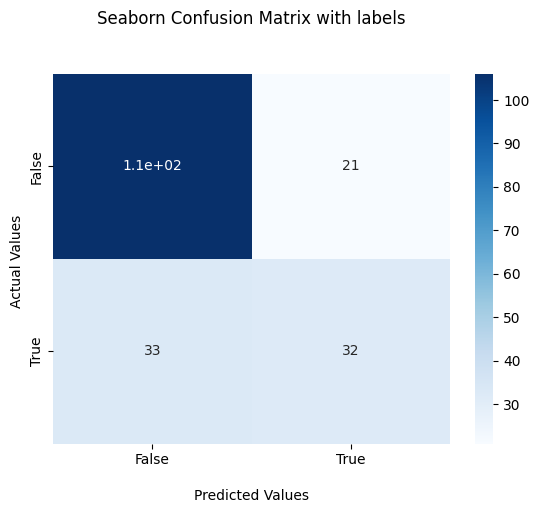

In [ ]:

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

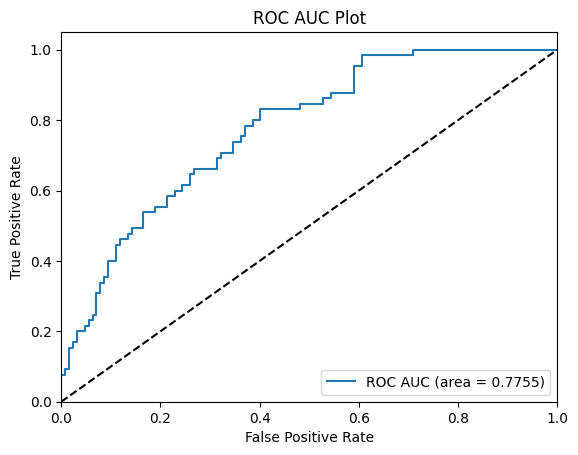

In [ ]:
# Calculate ROC AUC score
y_prob = [probs[1] for probs in model.predict_proba(X_test)]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

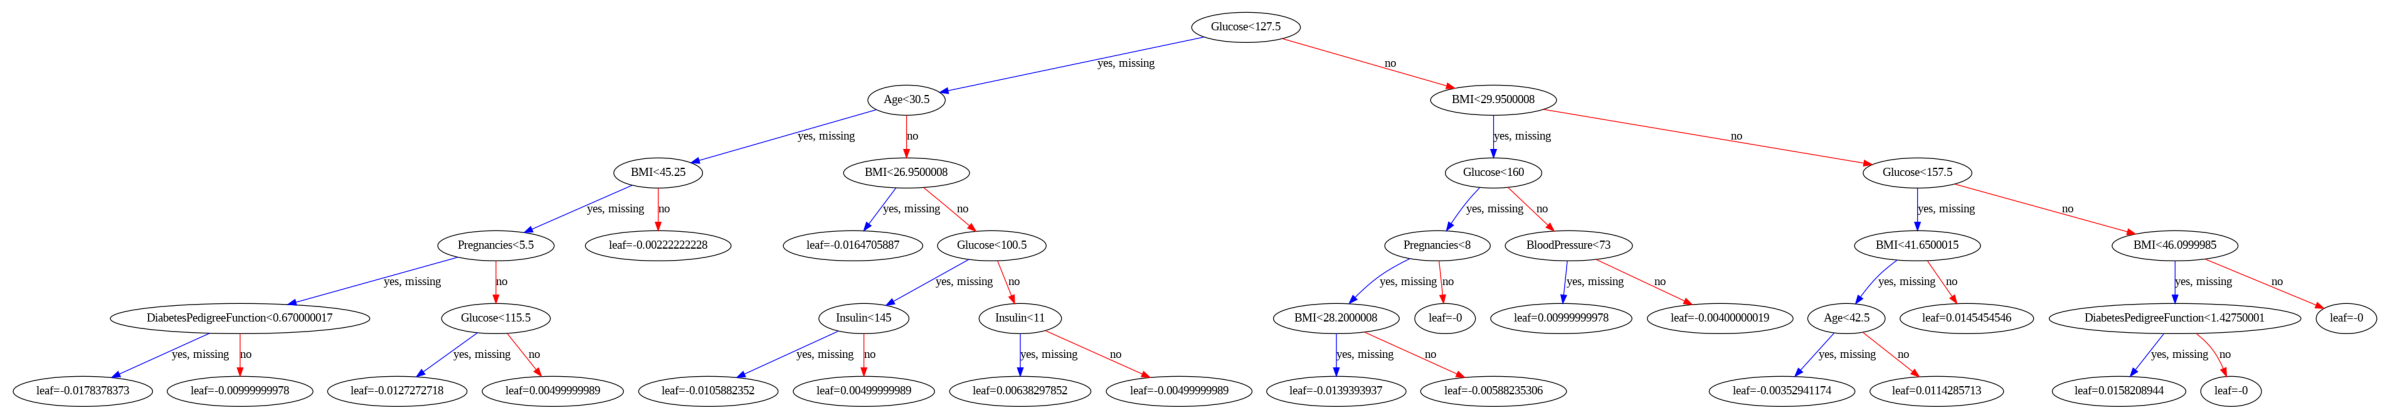

In [ ]:
# plot the first tree
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
plot_tree(model, num_trees=0, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# # plot the second last tree
# fig, ax = plt.subplots(1, 1, figsize=(24, 12))
# plot_tree(model, num_trees=-2, ax=ax)
# plt.tight_layout()
# plt.show()

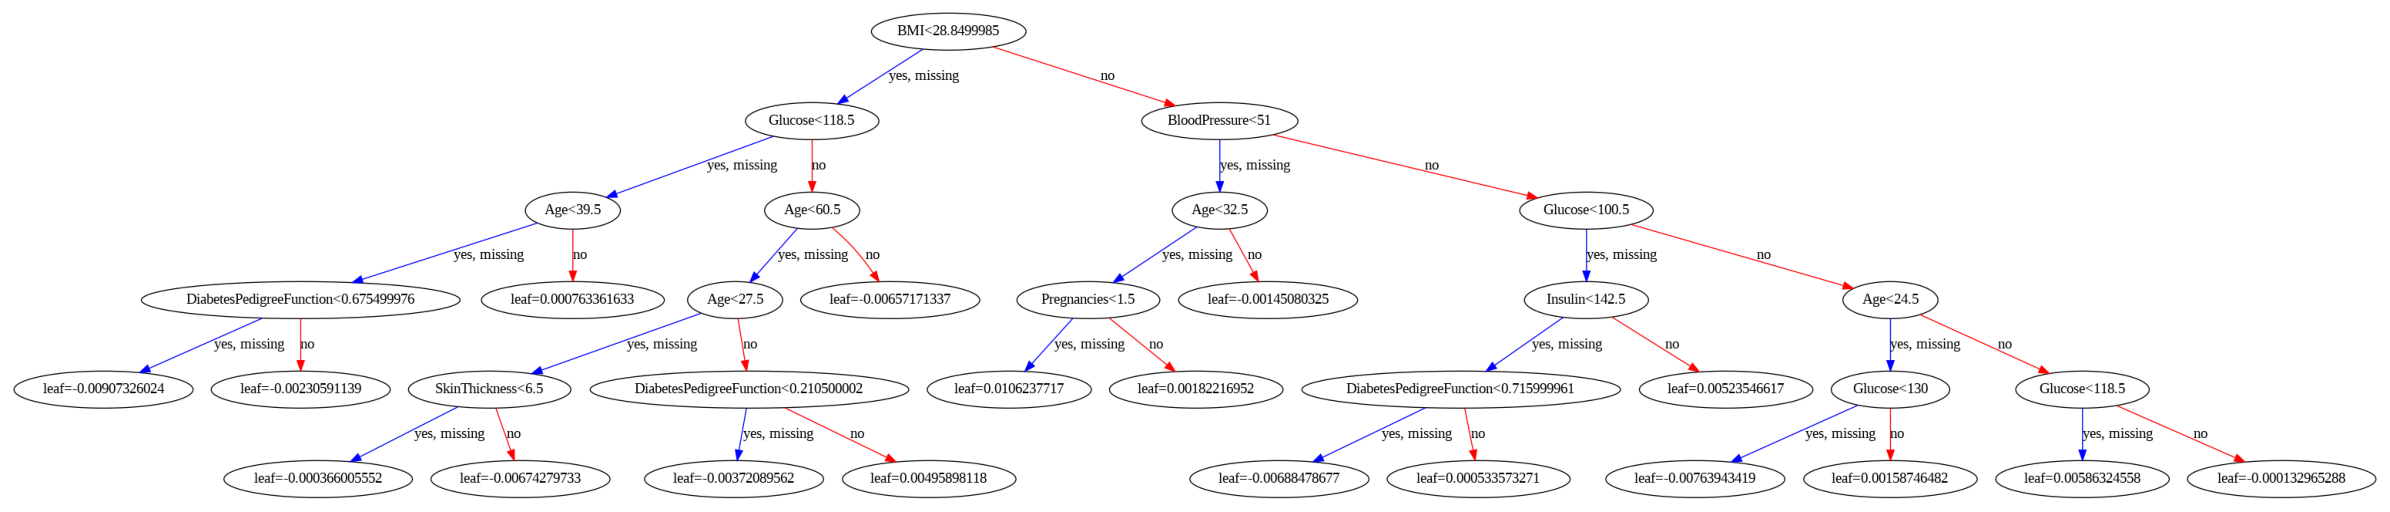

In [ ]:
# plot the last tree
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
plot_tree(model, num_trees=-1, ax=ax)
plt.tight_layout()
plt.show()

### **Interpretation of Leaf:**

In XGBoost, the `leaf` parameter for a node in a decision tree represents the predicted value for that node, which is used to make predictions for new instances that follow the path through the tree and end up in that leaf node.

The calculation of the `leaf` value is performed during the tree-building process, and depends on the objective function and the loss function used by the XGBoost model.

For example, in a binary classification problem where the **objective** is to **minimize the binary cross-entropy loss**, the `leaf` value for a leaf node that corresponds to the positive class would be calculated as:


`leaf = - (sum_grad / (sum_hess + lambda))`

where `sum_grad` and `sum_hess` are the `sum` of the `first-order` and `second-order` gradients (or `"gradients"` and `"hessians"`) of the training instances that end up in that leaf node, and `lambda` is a regularization term.

This formula is based on the **Newton-Raphson method** for approximating the optimal `leaf` value that minimizes the loss function, which in this case is the binary cross-entropy.

For a multi-class classification problem, the `leaf` value for a leaf node that corresponds to a specific class label is calculated similarly, but takes into account the gradients and hessians for that particular class label.

It's worth noting that the `leaf` values are calculated for each individual tree in the XGBoost ensemble, and the final predictions are obtained by combining the predictions of all the trees, weighted by their respective learning rates.


In [ ]:
# Get the feature importances from the fitted classifier
importances = model.feature_importances_

# Create a dataframe with the feature names and their importances
importance_df = pd.DataFrame({"feature": X.columns, "importance": importances})

# Sort the feature importances in descending order
importance_df = importance_df.sort_values("importance", ascending=False)

In [ ]:
# according to XGBOOST Classifier
importance_df.head()

,feature,importance
1,Glucose,0.289472
5,BMI,0.176670
7,Age,0.123794
4,Insulin,0.106113
6,DiabetesPedigreeFunction,0.086698


In [ ]:
!pip install shap
!pip install lime

In [ ]:
import lime
import shap

Intercept 0.2992709982766194
Prediction_local [0.64842501]
Right: 0.5933034


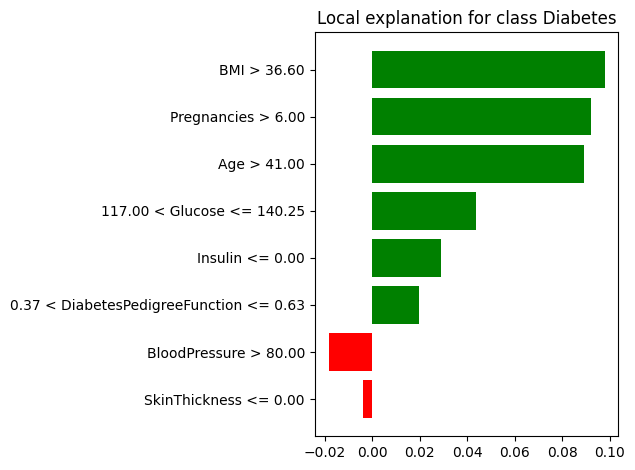

In [ ]:
#Explain samples in test set
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X.values,
                                                   feature_names=X.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=["No Diabetes", "Diabetes"],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=1)

#Explaining first sample in test set using all 4 features
exp = explainer.explain_instance(X_explain.values[0,:], model.predict_proba,
                                 num_features=8)
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

In [ ]:
# explain the model's predictions on test set using SHAP values
# same syntax works for xgboost, LightGBM, CatBoost, and some scikit-learn models
explainer = shap.TreeExplainer(model)

# shap_values consists of a list of two matrices of dimension samplesize x #features
shap_values = explainer.shap_values(X_explain)


# Interactive visualization of the explanation of the first subject
# in the test set (X_explain).
# It shows the relative contribution of features to get from the base value of High_BMI
# samples(average value)
# to the output value (1 in case of High_BMI sample)
# the numbers at the bottom show the actual values for this sample.
shap.initjs() #initialize javascript in cell
shap.force_plot(explainer.expected_value, shap_values[0,:], X_explain.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_explain)

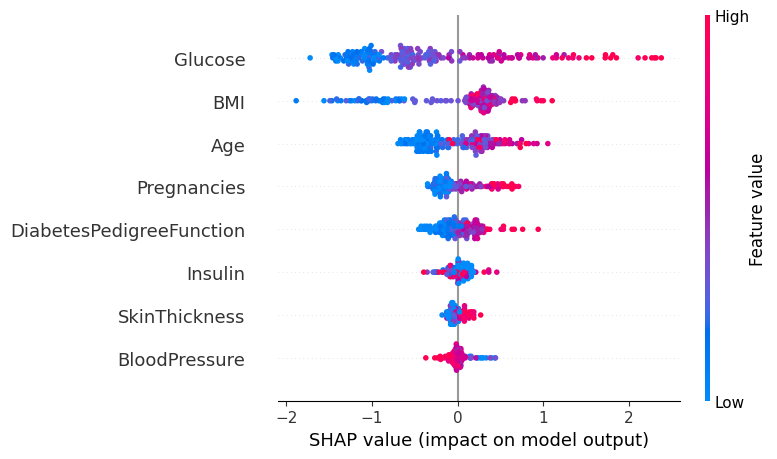

In [ ]:
#A summary plot with the shapley value (feature importance)
shap.summary_plot(shap_values, X_explain)